# DESCRIPTION
In the streaming industry, customer retention is crucial. This project aims to predict Customer Churn (whether a user will cancel their subscription) based on user activity patterns such as watch_hours, last_login_days, and subscription details.

The core objective of this notebook is to implement and compare two powerful Machine Learning algorithms to determine which one yields better predictive performance for this specific classification problem.

-> Workflow & Methodology:

Data Preprocessing: Handling categorical variables (Ordinal Encoding for subscription levels, One-Hot Encoding for others) and preparing the data for modeling.

Exploratory Data Analysis (EDA): Visualizing churn patterns using Countplots, KDE plots, and Correlation Heatmaps to identify key indicators of churn.

Model Building: Training two distinct ensemble learning models:

Random Forest Classifier: A bagging technique that reduces variance.

XGBoost Classifier: A boosting technique that reduces bias and improves accuracy sequentially.

Hyperparameter Tuning: Utilizing GridSearchCV with Cross-Validation (5-fold) to find the optimal parameters for both models.

Performance Evaluation: Comparing models based on Accuracy, Precision, Recall, F1-Score, Confusion Matrices, and ROC-AUC Curves.

Feature Importance: Analyzing which user behaviors (e.g., Average Watch Time) contribute most to the model's decision-making.

# <Center>Importing Libraries</center>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# <center> Reading & Analyzing Data </center>

In [ ]:
df = pd.read_csv("/kaggle/input/netflix-customer-churn-dataset/netflix_customer_churn.csv")
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [ ]:
df.isna().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [ ]:
df = df.drop(columns=['customer_id'])
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


# <center> Pandas Profiling </center>

In [ ]:
report = ProfileReport(df)
report.to_file("ydata_profiler_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 55.08it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report

- A lot of information is obtained from the profile report and also it indicates that there is quite good class balance overall categories.

# <center>Categorical Features EDA</center>

<Axes: xlabel='churned', ylabel='count'>

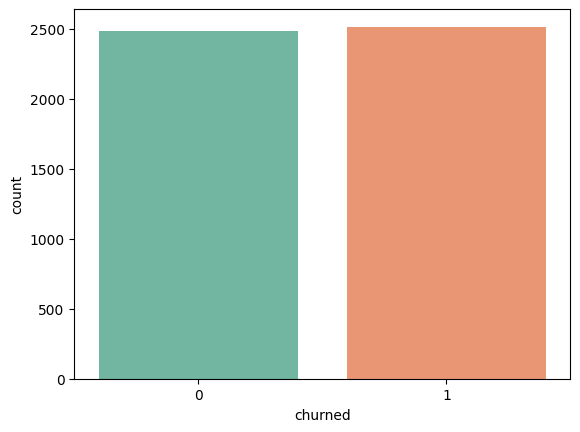

In [ ]:
# Churning rates for overall datset
sns.countplot(data=df,x=df['churned'],palette = 'Set2')

<Axes: xlabel='gender', ylabel='count'>

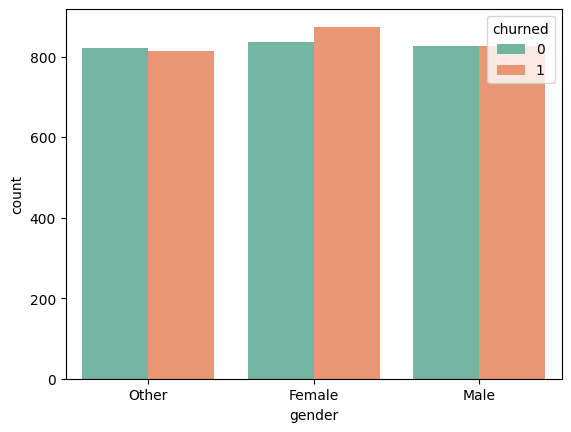

In [ ]:
# Chhurning rates according to gender column
sns.countplot(data=df,hue=df['churned'],x=df['gender'],palette = 'Set2')

<Axes: xlabel='subscription_type', ylabel='count'>

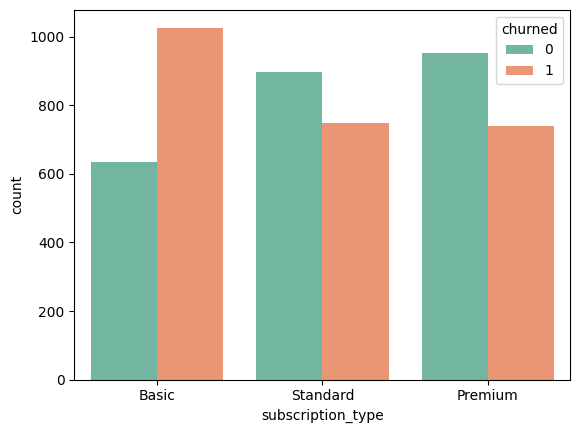

In [ ]:
#Churning rates for subscription type
sns.countplot(data=df,hue=df['churned'],x=df['subscription_type'],palette = 'Set2')

## Churn Count Plot for Gender and Subscription Type

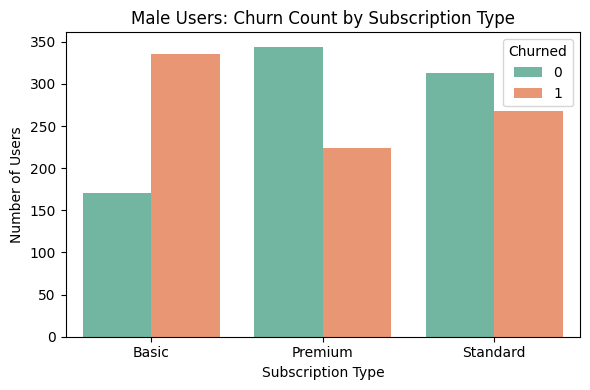

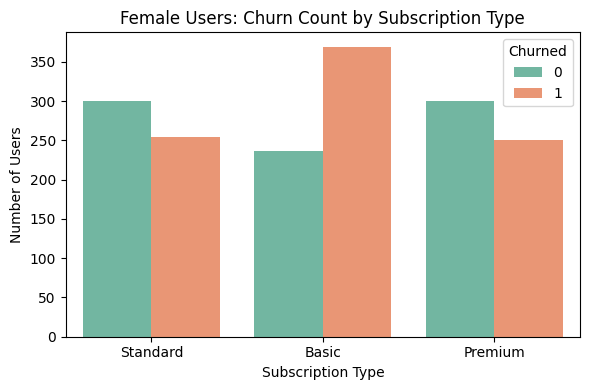

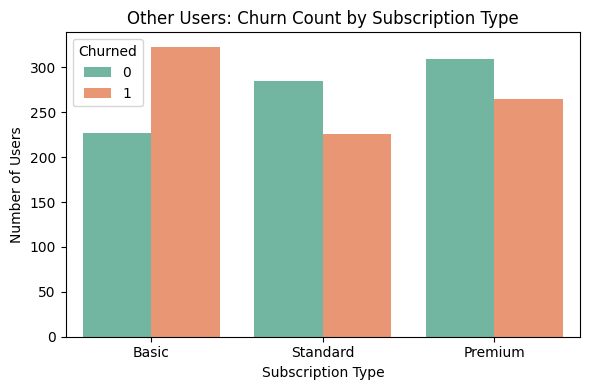

In [ ]:
genders = ['Male', 'Female', 'Other']

for gender in genders:
    plt.figure(figsize=(6, 4))
    subset = df[df['gender'] == gender]
    sns.countplot(
        data=subset,
        x='subscription_type',
        hue='churned',
        palette='Set2'
    )
    plt.title(f"{gender} Users: Churn Count by Subscription Type")
    plt.xlabel("Subscription Type")
    plt.ylabel("Number of Users")
    plt.legend(title="Churned")
    plt.tight_layout()
    plt.show()


 - In all genders we can see the most churn rate is in Basic subscription and females are having highest churn rate overall and a noticeable gap between the churned and non churned ones for standard subscription across all genders suggests that still there is okayish churn rate but surely lesser than the basic subscription and also as we can see that the churn gap is quite similar in all genders for standard and premium customers this suggests that there is approximately similar churn rate in the premium and standard subscription across all genders.

<Axes: xlabel='device', ylabel='count'>

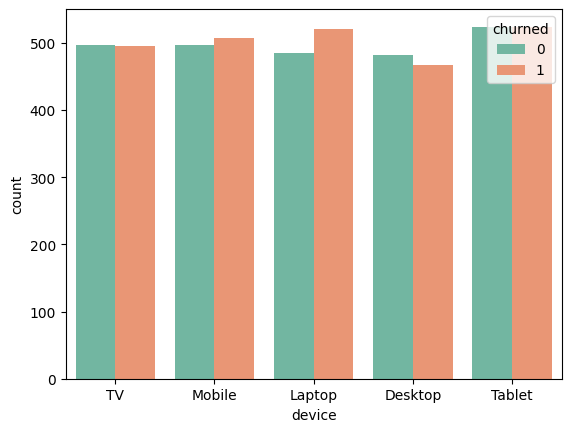

In [ ]:
# Churn rates based on Device
sns.countplot(data=df,x=df['device'],hue=df['churned'],palette='Set2')

- there's no significiant insight from this plot but still - the laptop users are having somewhat more churned rate

<Axes: xlabel='region', ylabel='count'>

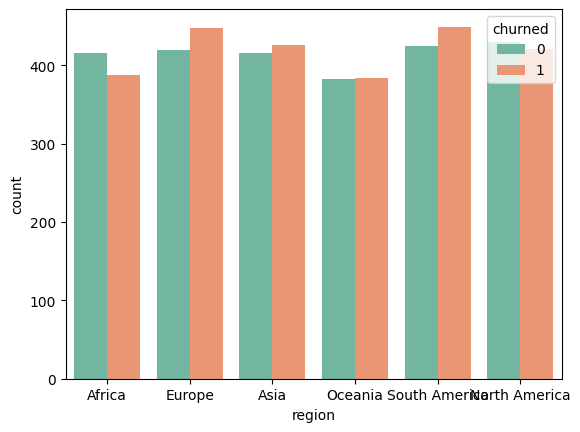

In [ ]:
# Churn rates based on Region
sns.countplot(data=df,x=df['region'],hue=df['churned'],palette='Set2')

- Europe and South America shows high churn rate overall across all regions but still no as such significiant insight.

<Axes: xlabel='favorite_genre', ylabel='count'>

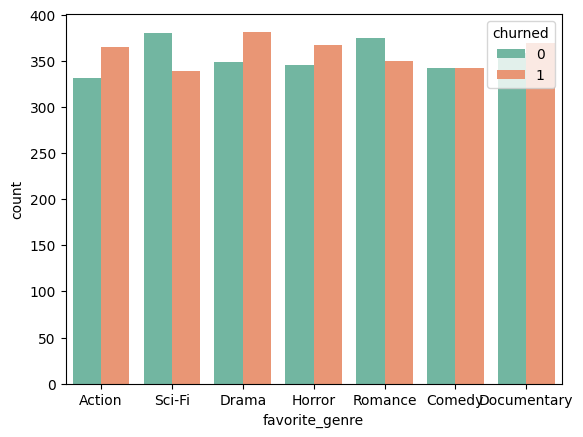

In [ ]:
# Churn rates based on genre
sns.countplot(data=df,x=df['favorite_genre'],hue=df['churned'],palette='Set2')

- the action and drama genre has quite more churned rate but still we dont have any significiant insight.

<Axes: xlabel='payment_method', ylabel='count'>

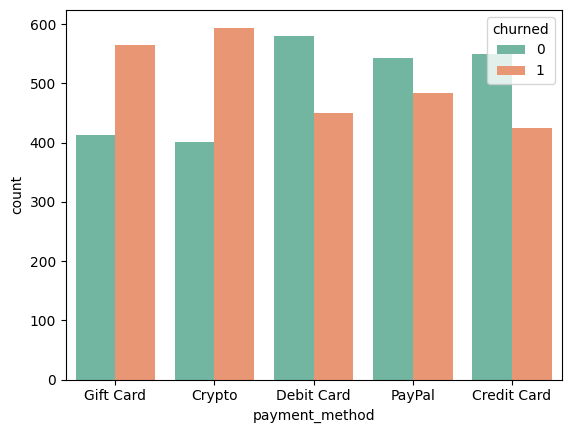

In [ ]:
# Churn rates based on payment method used for subscription
sns.countplot(data=df,x=df['payment_method'],hue=df['churned'],palette='Set2')

- A good insight we have gotten from this plot that the crypto and gift card users are having very high churned rate showing that the users having stable mode of payment that is Debit Card, PayPal and Credit Card are having lower churn rate.

<Axes: xlabel='number_of_profiles', ylabel='count'>

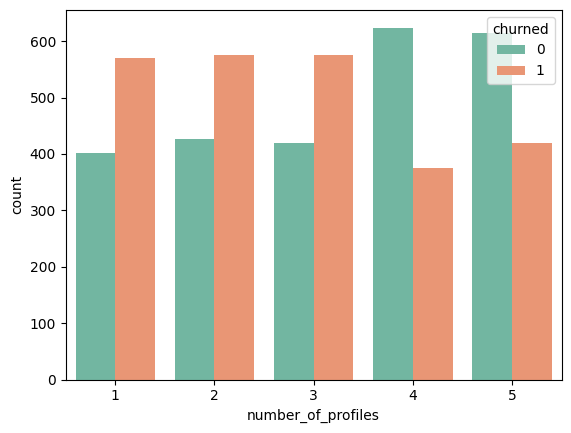

In [ ]:
#Churn rates based on number of profiles
sns.countplot(data=df,x=df['number_of_profiles'],hue=df['churned'],palette='Set2')

- we got a really good insight from this plot that the people having lesser profiles that is 1,2,3 are having higher churn rate and the ones hvaing high number of profiles (4,5) are having lower churn rate

# <center> Numerical Features EDA </center>

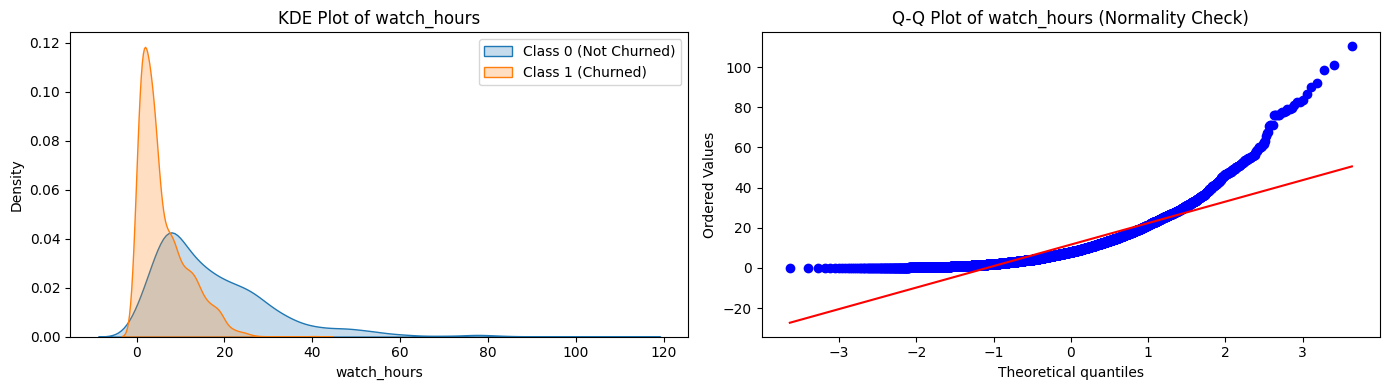

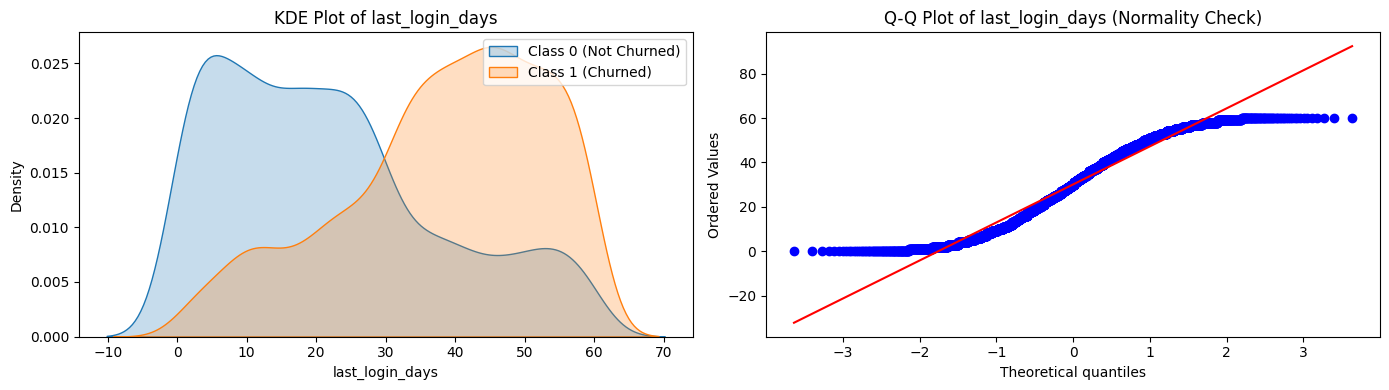

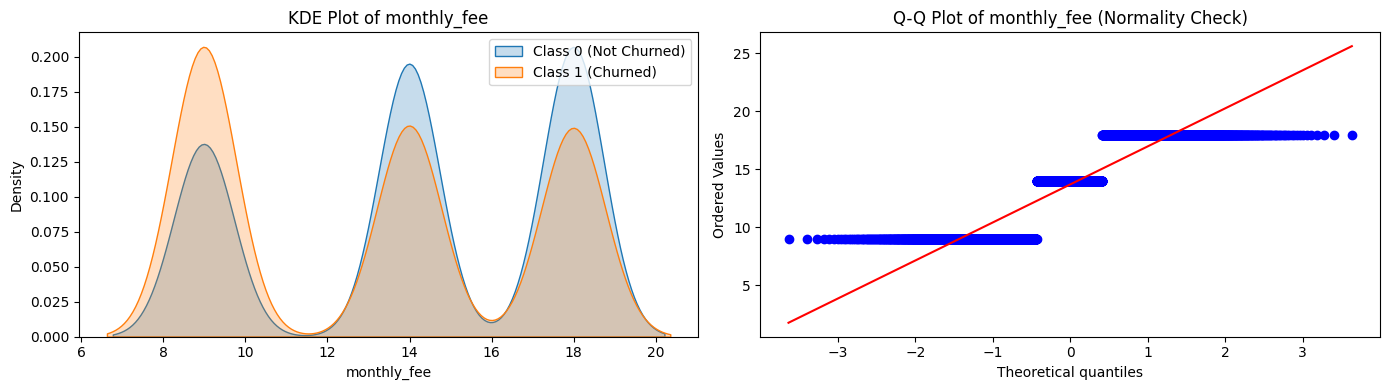

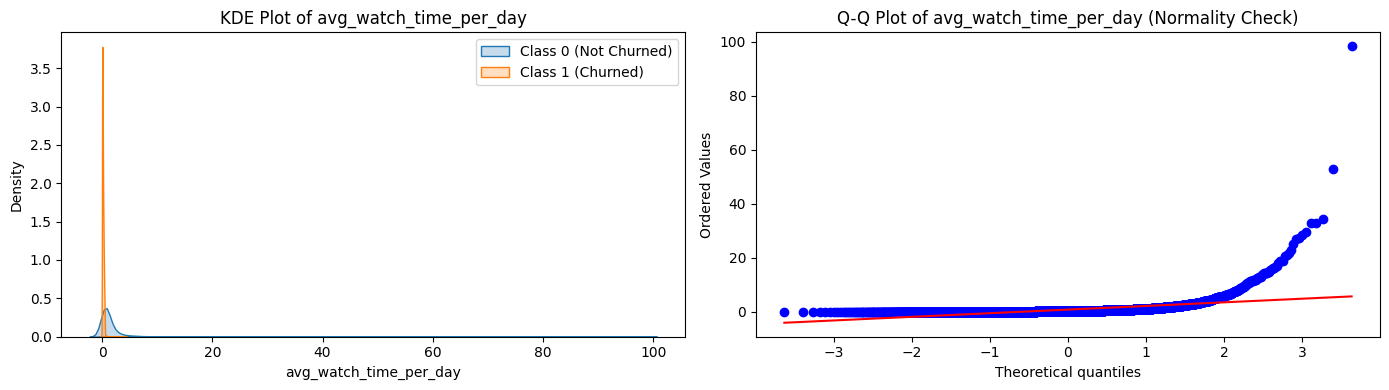

In [ ]:
num_features = ['watch_hours', 'last_login_days', 'monthly_fee', 'avg_watch_time_per_day']

for col in num_features:
    # Create 1x2 subplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # KDE plot on the left
    sns.kdeplot(data=df[df['churned'] == 0], x=col, label='Class 0 (Not Churned)', fill=True, ax=axes[0])
    sns.kdeplot(data=df[df['churned'] == 1], x=col, label='Class 1 (Churned)', fill=True, ax=axes[0])
    axes[0].set_title(f'KDE Plot of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # Q-Q plot on the right
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot of {col} (Normality Check)')

    plt.tight_layout()
    plt.show()

## <center> Distribution Analysis (KDE + Q-Q Plot) </center>

We analyzed each numerical feature using KDE plots (split by churned vs non-churned users) and Q-Q plots (to assess normality). Below is the feature-wise summary:

---

### `watch_hours`
- **KDE Insight**: Strong right-skew; non-churned users tend to have significantly higher watch hours.
- **Q-Q Plot**: Deviates strongly from normal line; heavy upper-tail (leptokurtic).
- **Note**: Outliers in non-churned users indicate deeper engagement — valuable signal for modeling.

---

### `last_login_days`
- **KDE Insight**: Trimodal-like shape; churned users mostly have higher login gap (i.e., they haven’t logged in recently).
- **Q-Q Plot**: Clearly non-normal; slight S-curve suggests skew and tail-heaviness.
- **Note**: Distribution may reflect different user retention groups (e.g., active, semi-active, inactive).

---

### `monthly_fee`
- **KDE Insight**: Discrete tri-modal structure around 8, 14, and 18 — likely reflects three subscription tiers.
- **Q-Q Plot**: Discrete plateaus; violates normality due to limited unique values.
- **Note**: Not suitable for transformation; should be treated as a **categorical variable**.

---

### `avg_watch_time_per_day`
- **KDE Insight**: Extremely right-skewed with dense peak near zero; churned users watch significantly less daily.
- **Q-Q Plot**: Highly non-linear, heavy upper tail with sharp spike; very far from Gaussian.
- **Note**: Feature is informative but needs log/Box-Cox/Yeo-Johnson transformation if used in linear models.

---

### Overall Notes:
- Most features are **not normally distributed** — skewed and/or multi-peaked.
- Many features have **outliers that carry strong class-differentiating signals**.
- Ideal preprocessing strategy:
  - Apply **non-linear transformations** (Yeo-Johnson, log) only where needed.
  - Prefer **tree-based models** that handle skew and outliers natively.


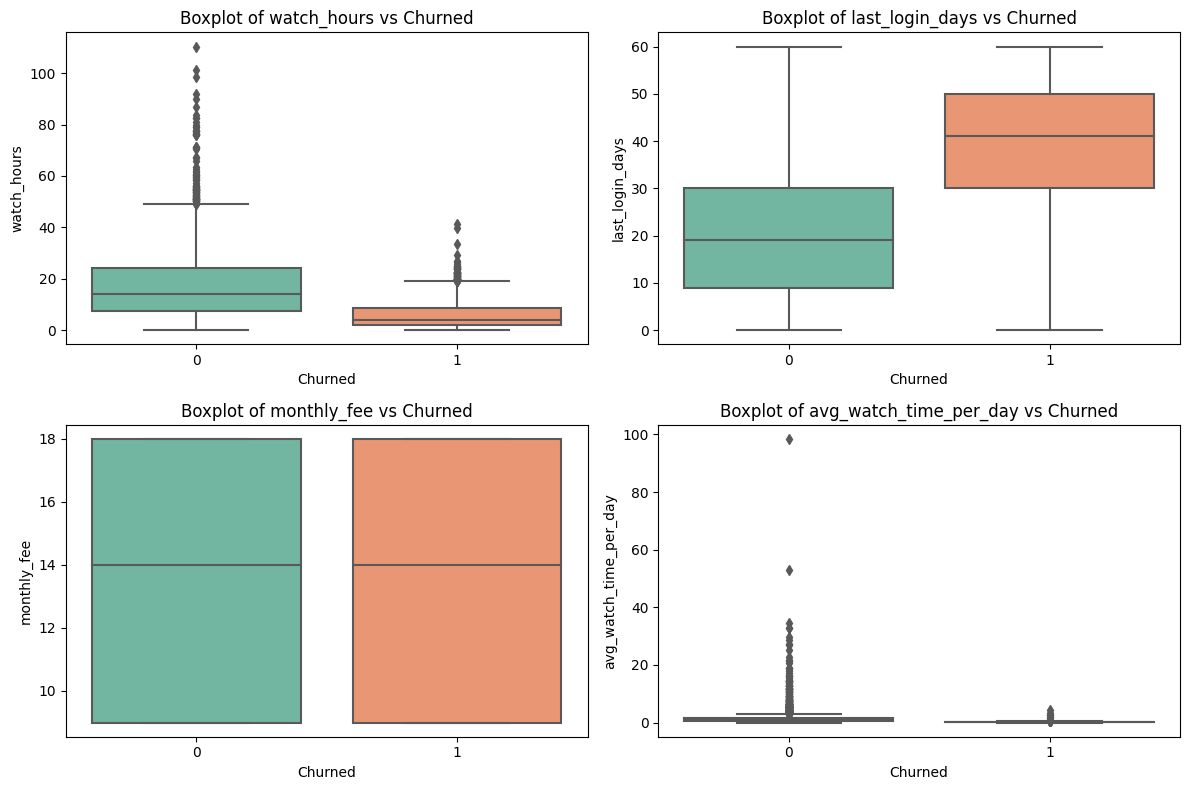

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(data=df, x='churned', y=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} vs Churned')
    axes[i].set_xlabel('Churned')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## <center> Box-Plot Analysis wrt. target feature </center>

---

### 1. watch_hours

- Non-churned users have higher median watch hours.
- The spread is wide, with many high-value outliers → indicates heavy usage behavior keeps users retained.
- Churned users have a very low median and fewer outliers → signals low engagement = higher churn.

Insight: Low overall engagement in terms of watch hours is a strong signal of churn.

---

### 2. last_login_days

- Churned users have higher median last_login_days → they’ve been inactive longer.
- Suggests that users tend to stop logging in before churning (makes sense).
- Distribution for non-churned is shifted toward recent logins (lower values).

Insight: Inactivity over time is a clear early warning signal for churn.

---

### 3. monthly_fee

- Median and range are almost identical for churned and non-churned.
- Looks like it’s likely a fixed fee structure (e.g., all users paying same money based on type of subscription).

No useful separation — this feature likely has no predictive power.

---

### 4. avg_watch_time_per_day

- Non-churned have higher average watch time per day with extreme outliers.
- Churned users show very low median usage.
- The spread is almost flat, meaning most churned users barely use the service daily.

Insight: Consistent low daily usage correlates with higher churn — even if they haven’t logged in recently (which seems contradictory but valid — explained below).

## <center> Numerical Feature Distribution Summary & Modeling Implications </center>

Based on KDE plots, Q-Q plots, and boxplots of numerical features (`watch_hours`, `last_login_days`, `monthly_fee`, `avg_watch_time_per_day`), we observed the following:

---

### Distribution Characteristics

- Most features are **heavily right-skewed** and **leptokurtic** (heavy tails, thin center).
- A feature `monthly_fee` showed **trimodal distribution** — shows the presence of **multiple latent user segments**.
- Q-Q plots for some features deviate significantly from the normal line — showing **non-normality**, extreme skew, or non-Gaussian shapes.
- Some features show **potential to be normalized** using:
  -  **Yeo-Johnson transformation** (works with both positive and negative values)
  -  **Box-Cox transformation** (only for strictly positive values)
- However, certain features will likely remain non-normal even after transformation — requiring alternative strategies like binning or nonlinear modeling.

---

### Outlier Analysis & Retention

- Several features (especially `watch_hours` and `avg_watch_time_per_day`) contain **extreme but meaningful outliers**.
- For instance:
  - Non-churned users tend to have **very high watch hours** (long-tail right-side outliers).
  - These outliers are **not noise**, but rather **key signals** of user loyalty and engagement.
- The **IQR range** `for avg_watch_time_per_day` features is narrow and overlaps between churned and non-churned groups.
  - Only **outliers help distinguish** between the two classes in such cases.
- Therefore, **removing outliers blindly would eliminate valuable information** and hurt model performance.

---

### Why Linear Models Are Not Ideal

- Linear models (e.g., Logistic Regression, Ridge, Lasso) assume:
  - Linearity
  - Homoscedasticity
  - Normality of residuals
  - Low multicollinearity
  - No extreme outliers
- These assumptions are **clearly violated** in this dataset due to:
  - Skewed features
  - Heavy tails and kurtosis
  - Non-linear patterns
  - Important but extreme outliers

---

### Tree-Based Models: The Best Fit

Tree-based models like **Random Forest**, **XGBoost**, **LightGBM**, and **CatBoost** are better suited here because they:
- Do **not assume normality**
- Are **robust to skewed distributions**
- Handle **non-linear interactions** automatically
- Are **insensitive to outliers**
- Require **minimal feature preprocessing or scaling**
- Can inherently capture thresholds, saturation, and decision boundaries in the data

---

### Final Intuition

Given the distributional properties and importance of outliers, we will proceed with **tree-based models** for churn prediction and avoid aggressive outlier removal or transformation that may destroy informative variance in the data.

# <center> Data Encoding </center>

## Ordinal Encoding

We used this for subscription_type to preserve the natural hierarchy (Basic < Standard < Premium) so the model understands that Premium is mathematically "higher" than Basic.


In [ ]:
ordinal_order = [['Basic', 'Standard', 'Premium']]
oe = OrdinalEncoder(categories=ordinal_order)
df['subscription_type'] = oe.fit_transform(df[['subscription_type']])

In [ ]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,0.0,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,1.0,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,1.0,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,2.0,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,1.0,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


## One Hot Encoding

We used this for gender, region, and device to convert text labels into numbers without tricking the model into thinking one category (like "Male") is ranked higher than another (like "Female").

In [ ]:
categorical_cols = ['gender','region', 'device', 'payment_method', 'favorite_genre']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert all dummy columns to int (0/1)
dummy_cols = [col for col in df.columns if any(cat in col for cat in categorical_cols)]
df[dummy_cols] = df[dummy_cols].astype(int)

In [ ]:
df.head()

,age,subscription_type,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,0.0,14.73,29,8.99,1,1,0.49,0,1,...,0,0,1,0,0,0,0,0,0,0
1,47,1.0,0.70,19,13.99,1,5,0.03,0,1,...,0,0,1,0,0,0,0,0,0,1
2,27,1.0,16.32,10,13.99,0,2,1.48,0,0,...,1,0,0,0,0,0,1,0,0,0
3,53,2.0,4.51,12,17.99,1,2,0.35,0,1,...,1,0,0,0,0,0,0,1,0,0
4,56,1.0,1.89,13,13.99,1,2,0.13,0,1,...,1,0,0,0,0,0,0,0,0,0


# <center> Feature Correlation Aanlysis </center>

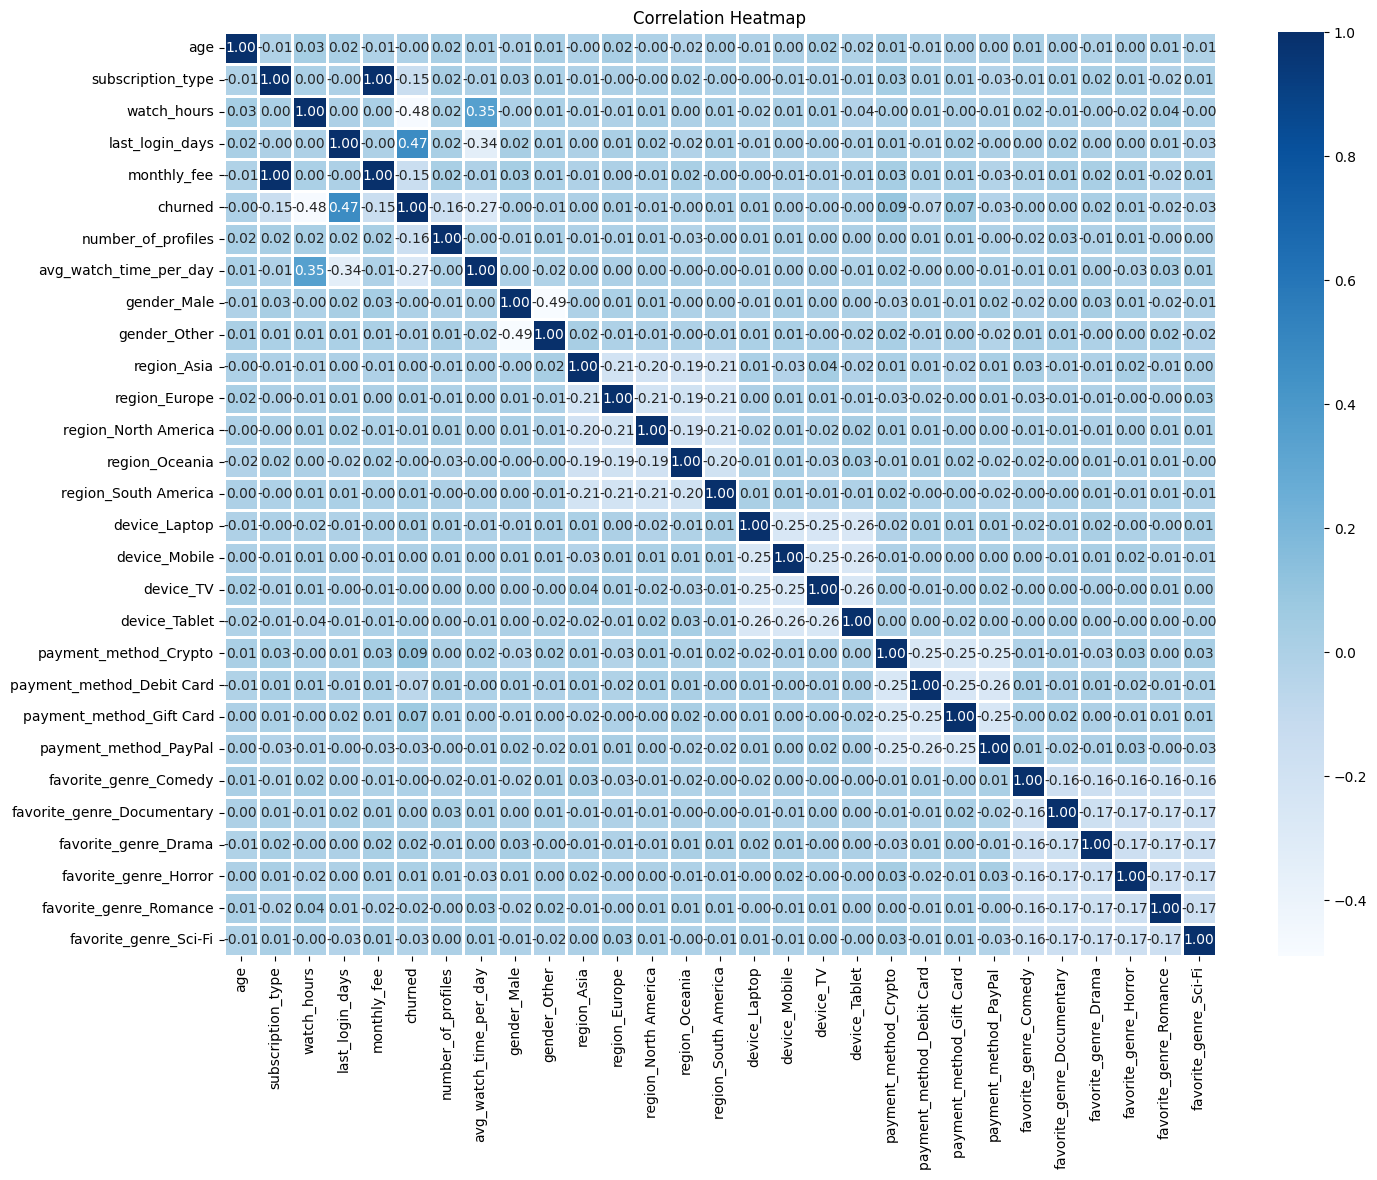

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

- `avg_watch_time_per_day` is highly overall correlated with `last_login_days` and `watch_hours`
- `churned` is highly overall correlated with `last_login_days`
- `last_login_days` is highly overall correlated with `avg_watch_time_per_day` and `churned`
- `monthly_fee` is highly overall correlated with `subscription_type`
- `subscription_type` is highly overall correlated with `monthly_fee`
- `watch_hours` is highly overall correlated with `avg_watch_time_per_day`

# <center>Train-Test Split</center>

In [ ]:
X = df.drop(columns=['churned'])
y = df['churned']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <center>Modeling - RandomForestClassifier + GridSearchCV & CrossValidation</center>

In [ ]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None,5,10,20],
    'min_samples_split': [None,1,2,3,5],
    'min_samples_leaf': [None,1,2,3,5],
}

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best CV Score: 0.9792500000000001


In [ ]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       498
           1       0.98      0.97      0.98       502

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



# USING XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [ ]:
# 1. Initialize the XGBoost Classifier
# eval_metric='logloss' removes a common warning in newer versions
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# 2. Define the parameter grid
# n_estimators: Number of trees
# max_depth: How deep each tree can grow (controls overfitting)
# learning_rate: How much each tree contributes (lower is usually better but slower)
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# 3. Setup GridSearchCV
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 4. Fit the model
print("Training XGBoost... this might take a moment.")
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost CV Score:", xgb_grid.best_score_)

Training XGBoost... this might take a moment.
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
Best XGBoost CV Score: 0.9935


--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       498
           1       1.00      0.99      0.99       502

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



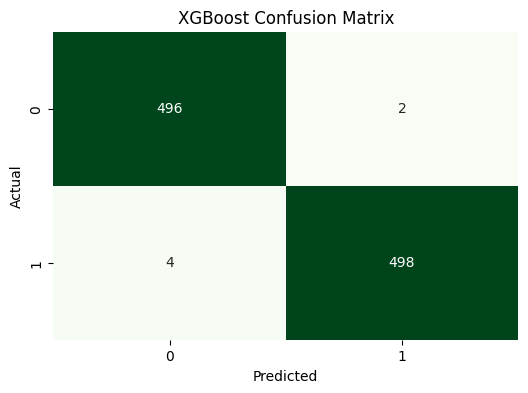

In [ ]:
# Predictions
y_pred_xgb = xgb_grid.predict(X_test)
y_prob_xgb = xgb_grid.predict_proba(X_test)[:, 1] # Probability of Churn (Class 1)

# Print Classification Report
print("--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Comparison


--- Model Comparison ---
               Accuracy  Precision    Recall  F1 Score   ROC AUC
Model                                                           
Random Forest     0.976   0.981855  0.970120  0.975952  0.998184
XGBoost           0.994   0.996000  0.992032  0.994012  0.999576


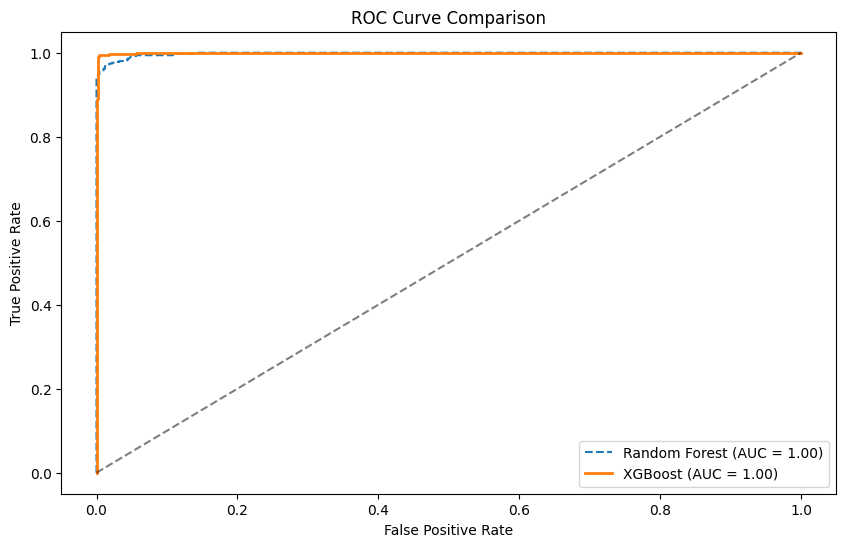

In [ ]:
# --- 1. Gather Random Forest Results (Using your previous grid_search variable) ---
y_pred_rf = grid_search.predict(X_test)
y_prob_rf = grid_search.predict_proba(X_test)[:, 1]

# --- 2. Calculate Metrics for Both Models ---
def get_metrics(y_true, y_pred, y_prob, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_prob)
    }

rf_metrics = get_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest")
xgb_metrics = get_metrics(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")

# --- 3. Create a Comparison DataFrame ---
comparison_df = pd.DataFrame([rf_metrics, xgb_metrics])
print("\n--- Model Comparison ---")
print(comparison_df.set_index('Model'))

# --- 4. Plot ROC Curve Comparison ---
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_metrics["ROC AUC"]:.2f})', linestyle='--')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_metrics["ROC AUC"]:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5) # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# <center>Confusion Matrix and Analysis</center>

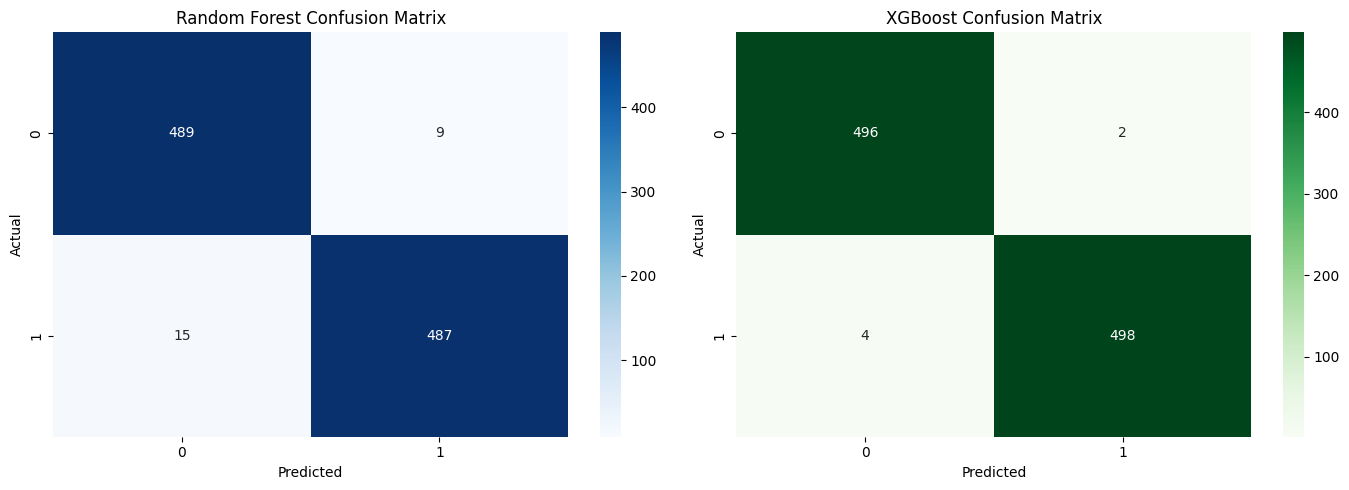

In [ ]:
# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest (Blue)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# XGBoost (Green)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# <center>Feature Importance</center>

## Using Random Forest inbuilt - feature_importances_

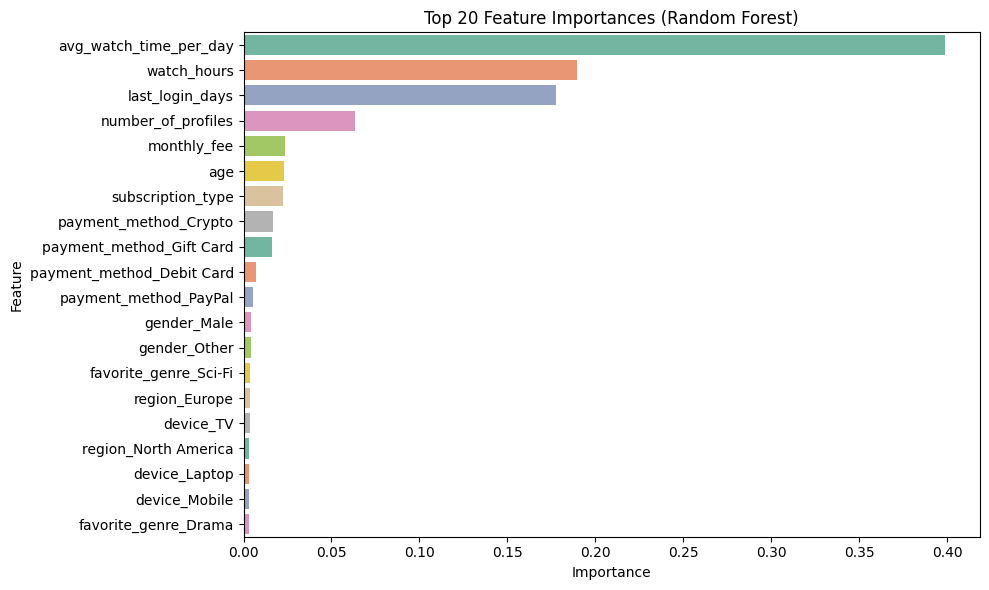

In [ ]:
feature_names = X_train.columns

importances = grid_search.best_estimator_.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='Set2')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


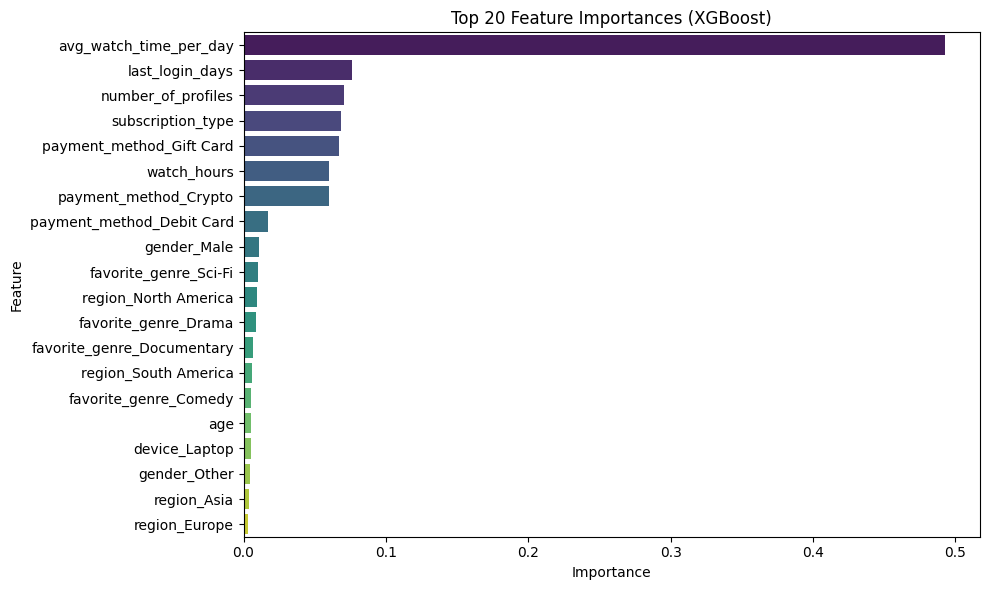

In [ ]:
# 1. Extract the best model from the XGBoost Grid Search
best_xgb_model = xgb_grid.best_estimator_

# 2. Get the feature importances
xgb_importances = best_xgb_model.feature_importances_

# 3. Create a DataFrame for easy plotting
xgb_feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# 4. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

- Model insights strongly align with our EDA findings. As identified earlier, we chose not to remove outliers in the avg_watch_time_per_day feature since they carried meaningful signal, particularly for churn prediction. This decision is validated by the model itself — avg_watch_time_per_day turned out to be the most important feature according to feature importance scores.

- On the other hand, during EDA we observed that payment_method, device, region, and favorite_genre offered minimal insight or separation between churned and non-churned users. This too is reflected in the model's behavior — these features show low importance, confirming their limited predictive power.

# CONCLUSION

Both ensemble models demonstrated exceptional performance on this dataset, but XGBoost emerged as the superior algorithm.

Performance: XGBoost achieved an Accuracy of 99%, slightly outperforming Random Forest, which achieved 98%.

Key Differentiator: XGBoost attained perfect Precision (1.00) for the positive class (Churned users) and perfect Recall (1.00) for the negative class. This indicates that XGBoost was better at minimizing False Positives compared to Random Forest.

Verdict: While both models are highly effective, XGBoost is the preferred model for this specific problem due to its ability to capture complex patterns with slightly higher precision and stability.